In [1]:
import pandas as pd

In [2]:
# load pre-processed dataset
df = pd.read_csv('../datasets/pre_processed_dataset.csv')
df.sample(3)

,quantity_sold_kg,unit_selling_price_rmb/kg,item_name_7 colour pepper,item_name_agaricus bisporus,item_name_aihao,item_name_basil,item_name_bell pepper,item_name_big broccoli,item_name_black chicken fir bacteria,item_name_black rapeseed,...,item_name_yuganjiao,item_name_yuxingcao,item_name_yuxingcao,item_name_zhimaxiancai,category_name_aquatic,category_name_cabbage,category_name_capsicum,category_name_flower,category_name_mushroom,category_name_solanum
4213,1.00,3.900000,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3878,1.00,1.833333,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4532,0.15,29.600000,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [3]:
from sklearn.model_selection import train_test_split
import tensorflow as tf

/Users/rumethsandinu/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [4]:
# define dependent and non dependent variables
y = df['quantity_sold_kg']
x = df.drop(columns=['quantity_sold_kg'], axis=1)

# split the dataset 0.8, 0.2
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

"""use float32 data type for numerical values to reduce memory usage and improve performance"""

# convert to tensor arrays
x_train_tensor = tf.constant(x_train, dtype=tf.float32)
y_train_tensor = tf.constant(y_train, dtype=tf.float32)

x_train_tensor.shape, x_test.shape

2024-03-31 20:24:37.973429: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2024-03-31 20:24:37.973456: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2024-03-31 20:24:37.973463: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2024-03-31 20:24:37.973849: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-03-31 20:24:37.973922: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


(TensorShape([3959, 110]), (990, 110))

In [5]:
# save testing dataset
df_test = pd.concat([y_test.reset_index(drop=True), x_test.reset_index(drop=True)], axis=1)
df_test.to_csv('../datasets/testing_dataset.csv')
df_test.sample(3)

,quantity_sold_kg,unit_selling_price_rmb/kg,item_name_7 colour pepper,item_name_agaricus bisporus,item_name_aihao,item_name_basil,item_name_bell pepper,item_name_big broccoli,item_name_black chicken fir bacteria,item_name_black rapeseed,...,item_name_yuganjiao,item_name_yuxingcao,item_name_yuxingcao,item_name_zhimaxiancai,category_name_aquatic,category_name_cabbage,category_name_capsicum,category_name_flower,category_name_mushroom,category_name_solanum
1,0.350000,7.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
461,0.317391,19.8,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
322,1.000000,2.5,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [6]:
# convert to tensor arrays
x_test_tensor = tf.constant(x_test, dtype=tf.float32)
y_test_tensor = tf.constant(y_test, dtype=tf.float32)

In [7]:
from sklearn.tree import DecisionTreeRegressor

In [8]:
model = DecisionTreeRegressor()
model.fit(x_train, y_train)
pred = model.predict(x_test)

In [9]:
from sklearn.metrics import mean_absolute_error

In [10]:
# Training set
train_pred = model.predict(x_train)
train_error = mean_absolute_error(y_train, train_pred)

# Testing set
test_pred = model.predict(x_test)
test_error = mean_absolute_error(y_test, test_pred)

print(f'Training Error: {train_error}')
print(f'Testing Error: {test_error}')

Training Error: 0.048241246114597756
Testing Error: 0.05788556470872028


In [11]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

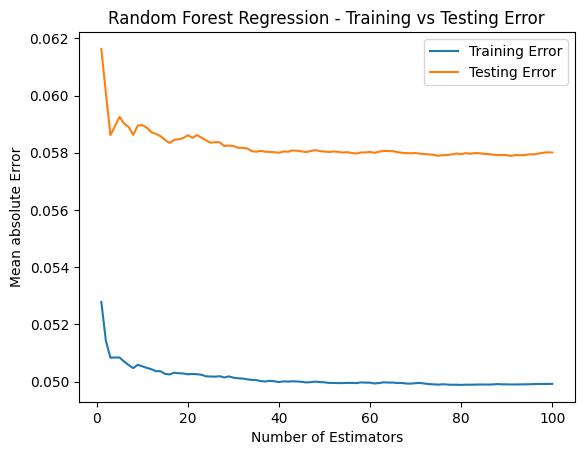

In [12]:
train_errors = []
test_errors = []

for i in range(1, 101):
    model = RandomForestRegressor(n_estimators=i, random_state=42)
    model.fit(x_train, y_train)
    
    # Training set
    train_pred = model.predict(x_train)
    train_error = mean_absolute_error(y_train, train_pred)
    train_errors.append(train_error)

    # Testing set
    test_pred = model.predict(x_test)
    test_error = mean_absolute_error(y_test, test_pred)
    test_errors.append(test_error)

# Plotting the results
plt.plot(range(1, 101), train_errors, label='Training Error')
plt.plot(range(1, 101), test_errors, label='Testing Error')
plt.title('Random Forest Regression - Training vs Testing Error')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean absolute Error')
plt.legend(loc='upper right')

In [13]:
# model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(x_train_tensor.shape[1], input_shape=(x_train_tensor.shape[1],)))
model.add(tf.keras.layers.Reshape((1, x_train_tensor.shape[1]))) 
model.add(tf.keras.layers.LSTM(128))
model.add(tf.keras.layers.Dense(64, activation='tanh'))
model.add(tf.keras.layers.Reshape((1, 64))) 
model.add(tf.keras.layers.LSTM(16))
model.add(tf.keras.layers.Dense(4, activation='tanh'))
model.add(tf.keras.layers.Dense(1, activation='linear'))

# compile model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4), loss='mae', metrics=['mae'])

epoch_number = 50

# train model and get history
history = model.fit(x_train_tensor, y_train_tensor, epochs=epoch_number, validation_data=(x_test, y_test))

/Users/rumethsandinu/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50


2024-03-31 20:25:25.877436: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


124/124 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.3810 - mae: 0.3810 - val_loss: 0.2650 - val_mae: 0.2650
Epoch 2/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2574 - mae: 0.2574 - val_loss: 0.2040 - val_mae: 0.2040
Epoch 3/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.2031 - mae: 0.2031 - val_loss: 0.1630 - val_mae: 0.1630
Epoch 4/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.1499 - mae: 0.1499 - val_loss: 0.1306 - val_mae: 0.1306
Epoch 5/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.1250 - mae: 0.1250 - val_loss: 0.1092 - val_mae: 0.1091
Epoch 6/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0996 - mae: 0.0996 - val_loss: 0.0920 - val_mae: 0.0920
Epoch 7/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0868 - mae: 0.0868 - val_loss: 0.0835 - val_mae: 0.0834
Epoch 8/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0800 - mae: 0.0800 - val_loss: 0.0728 - val_mae: 0.0727
Epoch 9/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss

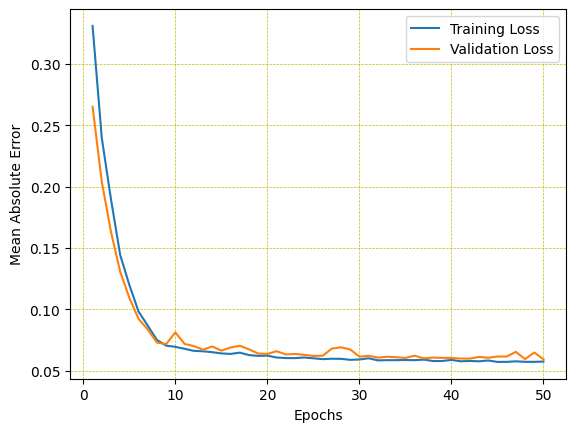

In [14]:
# plot loss with respect to epoch number
x_range = range(1, epoch_number + 1)
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(x_range, loss, label='Training Loss')
plt.plot(x_range, val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend(loc='upper right')
plt.grid(True, linewidth = 0.5, color = 'y', linestyle = '--')

In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 110)            │        12,210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 1, 110)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 128)            │       122,368 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_1 (Reshape)             │ (None, 1, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 16)             │         5,184 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │            68 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 444,275 (1.69 MB)

 Trainable params: 148,091 (578.48 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 296,184 (1.13 MB)

In [16]:
# view loss for testing values
model.evaluate(x_test, y_test)

31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0615 - mae: 0.0615


[0.05914374813437462, 0.059146031737327576]

In [17]:
# predict sample value set
y_predictions = model.predict(x_test)
y_predictions[:5]

31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step


array([[0.53165656],
       [0.34299374],
       [0.24852423],
       [0.41763246],
       [0.17987345]], dtype=float32)

In [18]:
# view actual values
y_test[:5]

230     0.750000
4597    0.350000
1954    0.280000
3916    0.900000
1844    0.316667
Name: quantity_sold_kg, dtype: float64

In [22]:
from sklearn.metrics import root_mean_squared_error

In [23]:
root_mean_squared_error(y_test, y_predictions)  

0.13335812322758073

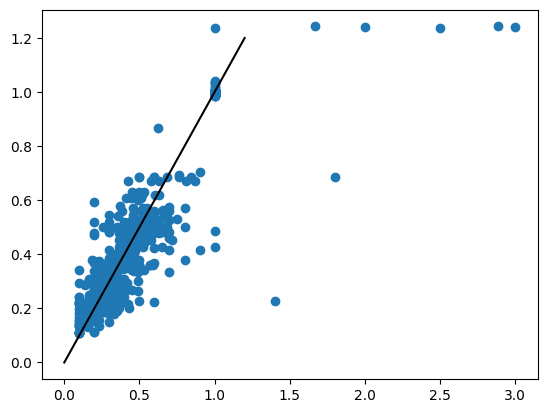

In [19]:
x = [0 , 1.2]
y = x

plt.scatter(y_test_tensor, y_predictions)
plt.plot(x, y, color='black')

In [20]:
# save final model
model.save('../models/sales_prediction_model.keras')